In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
raw = pd.read_csv('../dat/email-Eu-core-temporal-Dept3.txt', header=None, names=['src', 'tgt', 'time'], sep=' ')
raw.head()

,src,tgt,time
0,11,39,0
1,48,54,2635
2,69,60,4249
3,69,60,13362
4,33,84,16943


In [3]:
raw.shape

(12216, 3)

In [4]:
node_list = raw['src'].unique()
node_list = np.append(node_list, raw['tgt'].unique())
node_list = np.unique(node_list)

In [5]:
node_list == np.array(range(89))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False], dtype=bool)

In [6]:
node_list

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89])

In [7]:
graph = nx.DiGraph()

for i in range(raw.shape[0]):
    graph.add_edge(raw.iloc[i]['src'], raw.iloc[i]['tgt'], time=raw.iloc[i]['time'])

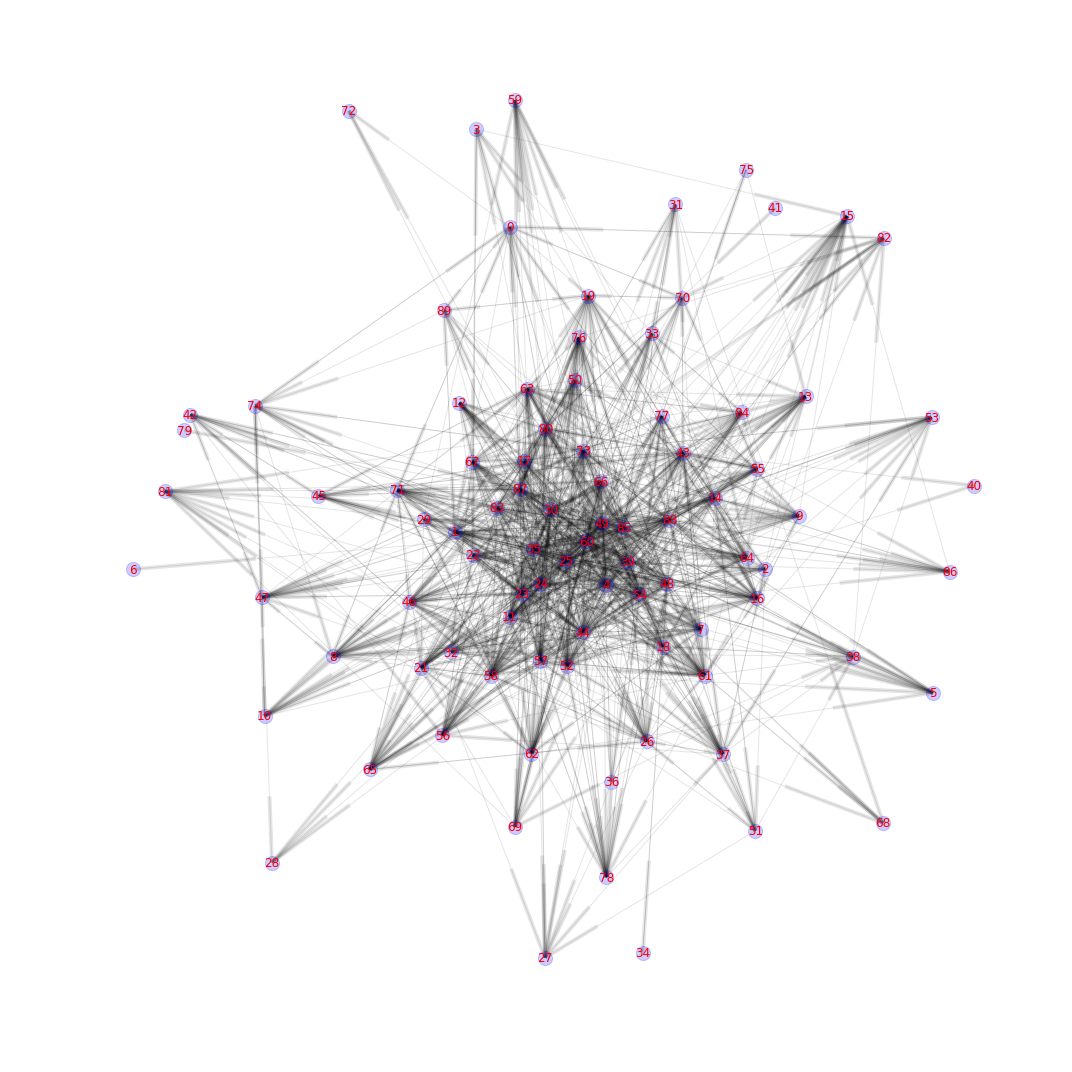

CPU times: user 496 ms, sys: 8 ms, total: 504 ms
Wall time: 504 ms


In [8]:
%%time

plt.figure(figsize=(15,15))
pos = nx.spring_layout(graph, k=1)

nx.draw_networkx_nodes(graph, pos, node_size=200, alpha=0.2, node_color='blue')
nx.draw_networkx_edges(graph, pos, alpha=0.1)

nx.draw_networkx_labels(graph, pos, font_size=12, font_color='red')

plt.tight_layout()
plt.axis('off')
plt.show()
#plt.savefig('../dat/email_graph.png', dpi=300, transparent=True)

## directed/undirected test

In [9]:
adjacency_matrix = nx.adjacency_matrix(graph)
adjacency_matrix = adjacency_matrix.toarray()

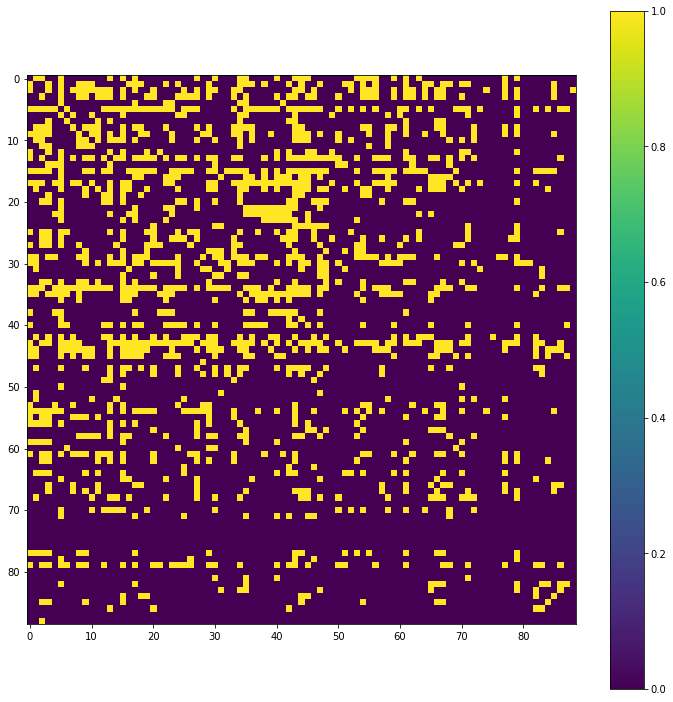

In [10]:
plt.figure(figsize=(10,10))

plt.imshow(adjacency_matrix)

plt.tight_layout()
plt.colorbar()
plt.show()
#plt.savefig('../dat/adjacency.png', dpi=300, transparent=True)

In [11]:
adjacency_matrix.shape

(89, 89)

check to see if it's symmetric (matrix = transpose of matrix):

In [12]:
np.array([[1,1],[1,1]]) == np.transpose(np.array([[1,1],[1,1]]))

array([[ True,  True],
       [ True,  True]], dtype=bool)

True
False


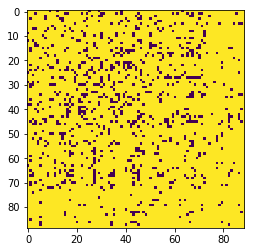

In [13]:
print(np.amax(adjacency_matrix == np.transpose(adjacency_matrix)))
print(np.amin(adjacency_matrix == np.transpose(adjacency_matrix)))
plt.imshow(adjacency_matrix == np.transpose(adjacency_matrix))
plt.show()

# embedding

## eigenvector decomposition

In [14]:
evals, evects = np.linalg.eig(adjacency_matrix)

In [15]:
evals.shape

(89,)

In [16]:
evects.shape

(89, 89)

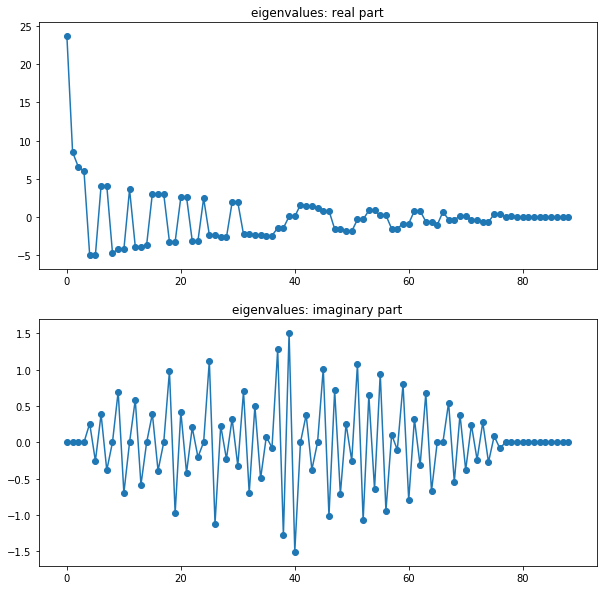

In [17]:
f, (ax1, ax2) = plt.subplots(2, figsize=(10,10))

ax1.plot(np.real(evals))
ax1.scatter(range(evals.shape[0]), np.real(evals))
ax1.set_title('eigenvalues: real part')
ax2.plot(np.imag(evals))
ax2.scatter(range(evals.shape[0]), np.imag(evals))
ax2.set_title('eigenvalues: imaginary part')

plt.show()

In [18]:
print(evals[0])
print(evals[1])

(23.613350303+0j)
(8.47891551163+0j)


In [19]:
print(np.amax(np.imag(evects[:,0])))
print(np.amax(np.imag(evects[:,1])))

0.0
0.0


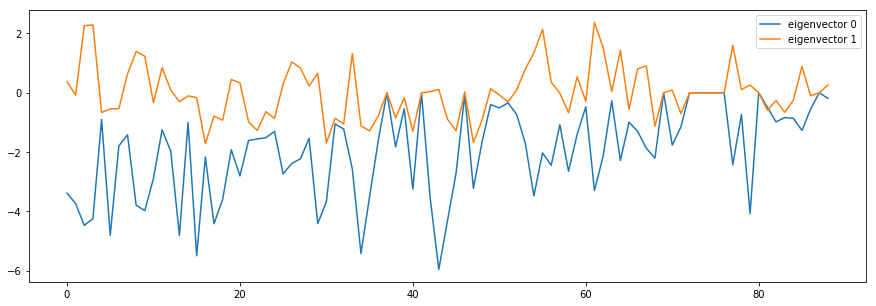

In [20]:
plt.figure(figsize=(15,5))

plt.plot(np.real(evals[0])*np.real(evects[:,0]), label='eigenvector 0')
plt.plot(np.real(evals[1])*np.real(evects[:,1]), label='eigenvector 1')

plt.legend()
plt.show()

In [21]:
eproj1 = np.zeros(adjacency_matrix.shape[0])
eproj2 = np.zeros(adjacency_matrix.shape[0])

vect1 = np.real(evals[0]) * np.real(evects[:,0])
vect2 = np.real(evals[1]) * np.real(evects[:,1])

for i in range(adjacency_matrix.shape[0]):
    eproj1[i] = np.dot(adjacency_matrix[:,i], vect1)
    eproj2[i] = np.dot(adjacency_matrix[:,i], vect2)

/home/gram/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


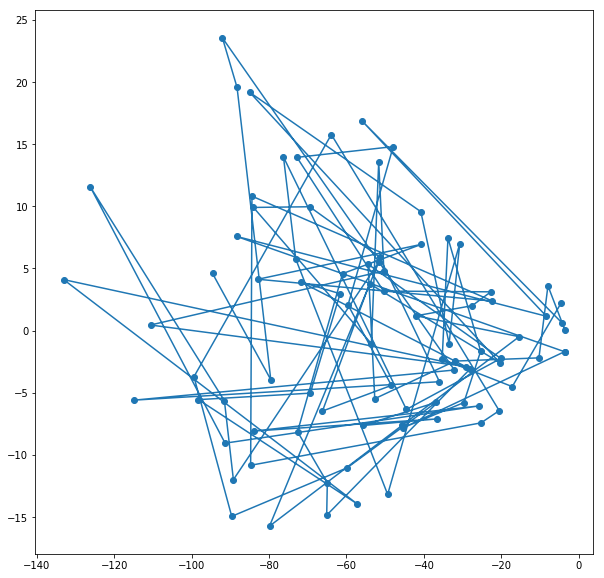

In [22]:
plt.figure(figsize=(10,10))

plt.plot(eproj1, eproj2)
plt.scatter(eproj1, eproj2)

plt.legend()
plt.show()

## principal component analysis

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=2)

In [25]:
pca.fit(adjacency_matrix)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
pcs = pca.fit_transform(adjacency_matrix)

In [27]:
pproj1 = np.zeros(adjacency_matrix.shape[0])
pproj2 = np.zeros(adjacency_matrix.shape[0])

vect1 = pcs[:,0]
vect2 = pcs[:,1]

for i in range(adjacency_matrix.shape[0]):
    pproj1[i] = np.dot(adjacency_matrix[:,i], vect1)
    pproj2[i] = np.dot(adjacency_matrix[:,i], vect2)

/home/gram/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


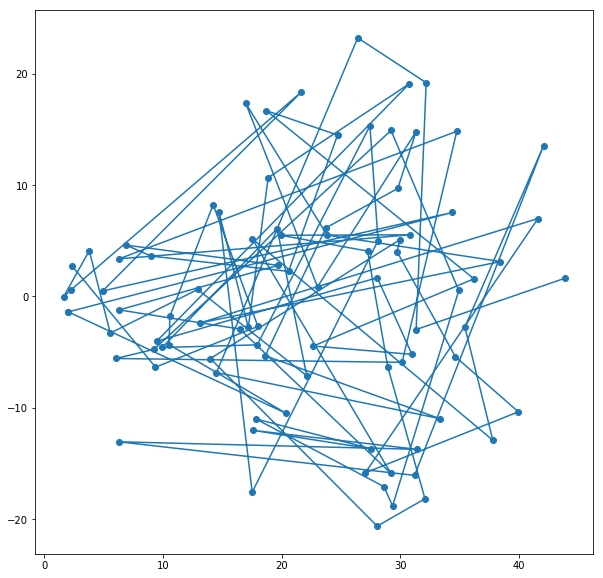

In [28]:
plt.figure(figsize=(10,10))

plt.plot(pproj1, pproj2)
plt.scatter(pproj1, pproj2)

plt.legend()
plt.show()

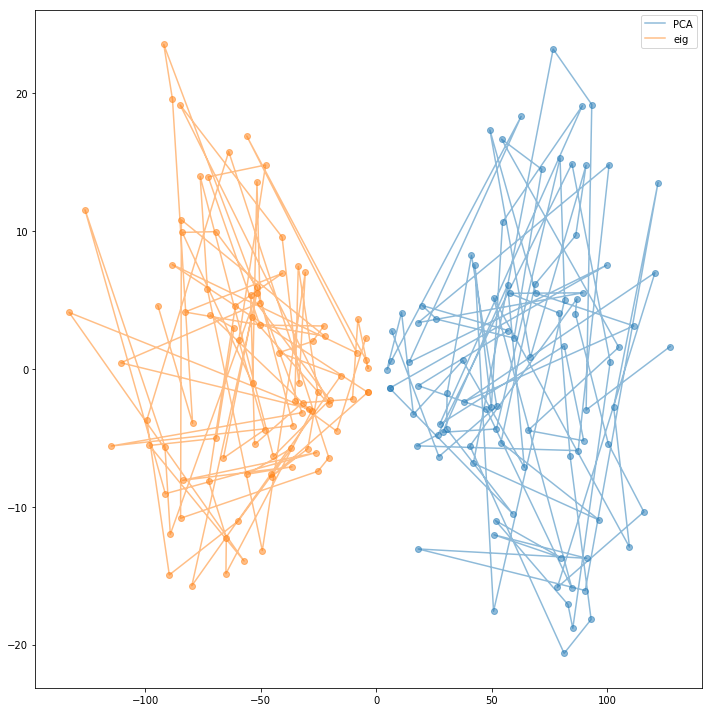

In [29]:
xscale = 2.9

plt.figure(figsize=(10,10))

plt.plot(xscale*pproj1, pproj2, label='PCA', alpha=0.5)
plt.scatter(xscale*pproj1, pproj2, alpha=0.5)

plt.plot(eproj1, eproj2, label='eig', alpha=0.5)
plt.scatter(eproj1, eproj2, alpha=0.5)

plt.tight_layout()
plt.legend()
plt.show()
#plt.savefig('../dat/embeddings', dpi=300, transparent=True)

## Kipf and Welling "embedding" 

In [30]:
a_ = adjacency_matrix + np.eye(adjacency_matrix.shape[0])

there's a problem here with the shapes of adj(graph) and degree(graph). Seems like the adj matrix should have 90x90 elements, since there are nodes 0 through node 89.

In [31]:
degree_matrix = np.zeros((adjacency_matrix.shape[0], adjacency_matrix.shape[0]))

for i in list(graph.degree()):
    if i[0] == 89:
        continue
    else:
        degree_matrix[i[0],i[0]] = i[1]
    
degree_matrix = degree_matrix + np.eye(degree_matrix.shape[0])

d_ = np.power(degree_matrix,-1/2)
d_[d_ == np.inf] = 0

/home/gram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in power
  # This is added back by InteractiveShellApp.init_path()


In [122]:
def linear_layer(a, d, h, out_shape0, out_shape1):
    y = np.matmul(d, np.matmul(a, d))
    
    w = np.random.rand(out_shape0, out_shape1)
    
    temp = np.matmul(h,w)
    kernel = np.array([temp for i in range(out_shape0)])
    
    return np.matmul(y, kernel)

In [123]:
ftrs = np.random.rand((a_.shape[0]))
kipf = linear_layer(a_, d_, ftrs, ftrs.shape[0], 2)

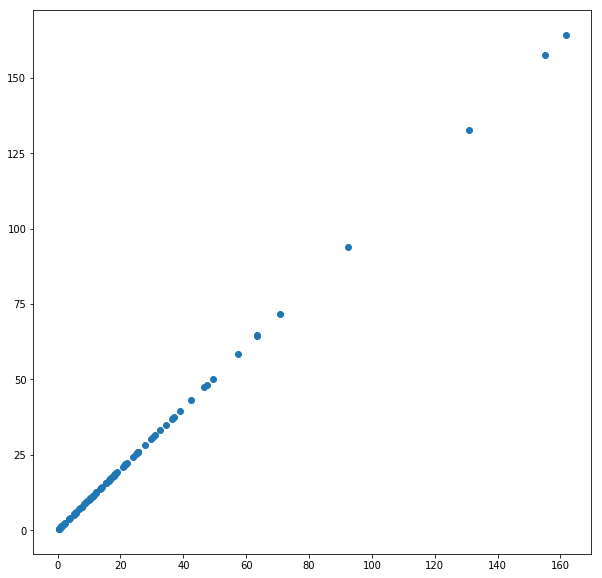

In [124]:
plt.figure(figsize=(10,10))

plt.scatter(kipf[:,0], kipf[:,1])

plt.show()

In [129]:
def tanh_layer(a, d, h, out_shape0, out_shape1):
    y = np.matmul(d, np.matmul(a, d))
    
    w = np.random.rand(out_shape0, out_shape1)
    
    temp = np.matmul(h,w)
    kernel = np.array([temp for i in range(out_shape0)])
    
    return np.tanh(np.matmul(y, kernel))

In [130]:
ftrs = np.random.rand((a_.shape[0]))
kipf = linear_layer(a_, d_, ftrs, ftrs.shape[0], 2)

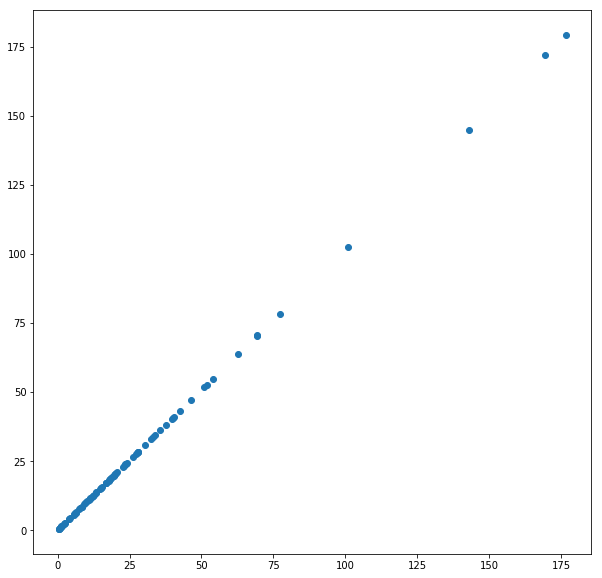

In [131]:
plt.figure(figsize=(10,10))

plt.scatter(kipf[:,0], kipf[:,1])

plt.show()

In [132]:
linear_layer(a_, d_, kipf, kipf.shape[0], 2)

ValueError: shapes (89,2) and (89,2) not aligned: 2 (dim 1) != 89 (dim 0)